Adicionando libs e setando uma array com caminho das imagens

In [204]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot(imagens, title): 
  plt.imshow(imagens)
  plt.title(title)
  plt.axis("off")
  plt.show()
  

In [205]:
image_paths = ["P1.png", "P2.png", "P3.jpg", "P4.png"]  

Lendo imagens e dando um resize nelas para que todoas tenham mesmo w e h

In [206]:
images = [cv2.imread(img) for img in image_paths]
height, width = images[0].shape[:2]
images = [cv2.resize(img, (width, height)) for img in images]

Mesclando todoas as imagens COM HSTACK (Stack arrays in sequence horizontally (column wise))

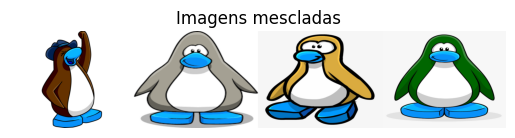

In [207]:
combined_image = np.hstack(images)
plot(combined_image, "Imagens mescladas")

Invertendo canais RGB

Convertendo para HSV e alterando a matiz (Hue) da imagem no espaço de cores HSV.

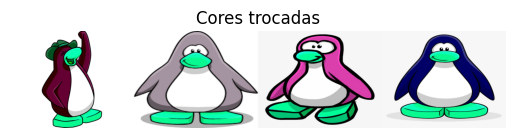

In [208]:
hsv_image = cv2.cvtColor(combined_image, cv2.COLOR_BGR2HSV)

hsv_image[:, :, 0] = (hsv_image[:, :, 0] + 60) % 180

swapped_colors = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

plot(cv2.cvtColor(swapped_colors, cv2.COLOR_BGR2RGB), "Cores trocadas")



Espelhamento com flip

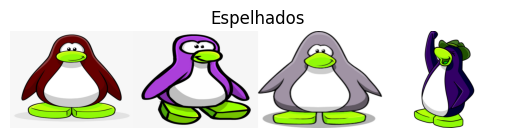

In [209]:
mirrored_image = cv2.flip(swapped_colors,1)
plot(mirrored_image, "Espelhados")

Recortar favorito. Como todos estao do mesmo tamanho fica mais facil

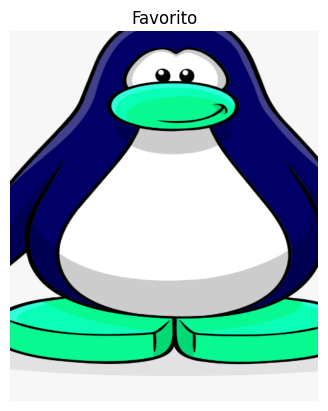

In [210]:
x, y, w, h = 150, 50, 500, 600  
cropped_penguin = mirrored_image[y:y+h, x:x+w]
plot(cv2.cvtColor(cropped_penguin, cv2.COLOR_BGR2RGB), "Favorito")


100 e 150 de threshold, pois parece haver uma separação clara entre as áreas escuras e claras da imagem.

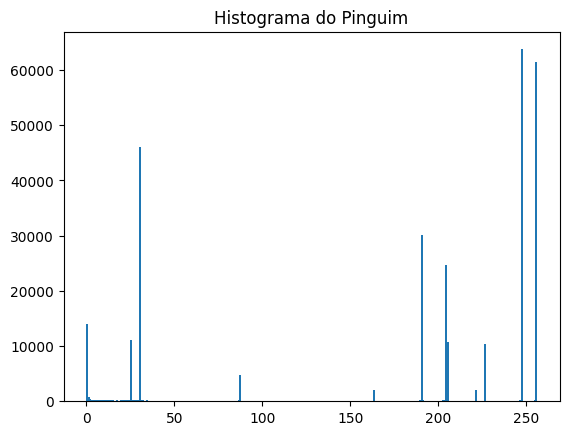

In [211]:
gray_image = cv2.cvtColor(cropped_penguin, cv2.COLOR_RGB2GRAY)
plt.hist(gray_image.ravel(), bins=256, range=[0,256])
plt.title("Histograma do Pinguim")
plt.show()


_, thresholded = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

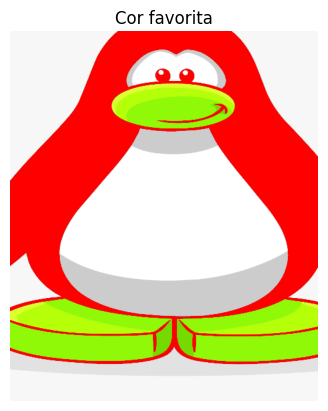

In [212]:
favorite_color = [255, 0, 0] 
mask = thresholded == 0
color_image = cropped_penguin.copy()
color_image[mask] = favorite_color

plot(color_image, "Cor favorita")
    